## Statsmodels v.s. Scikit-learn

** Ruixue Gong, NYU**

This notebook helps economists better understand the differences and similarities between machine learning package Scikit-learn and traditional statistical package Statsmodels. 

First of all, we provide an overview of Scikit-learn and Statsmodels. Secondly, we make a brief contrast of these two packages. At last, we talk about the applications on several topics such as linear regression models, logistic models and time series analysis with the use of Statsmodels and Scikit-learn respectively.


* Overview of Scikit-learn

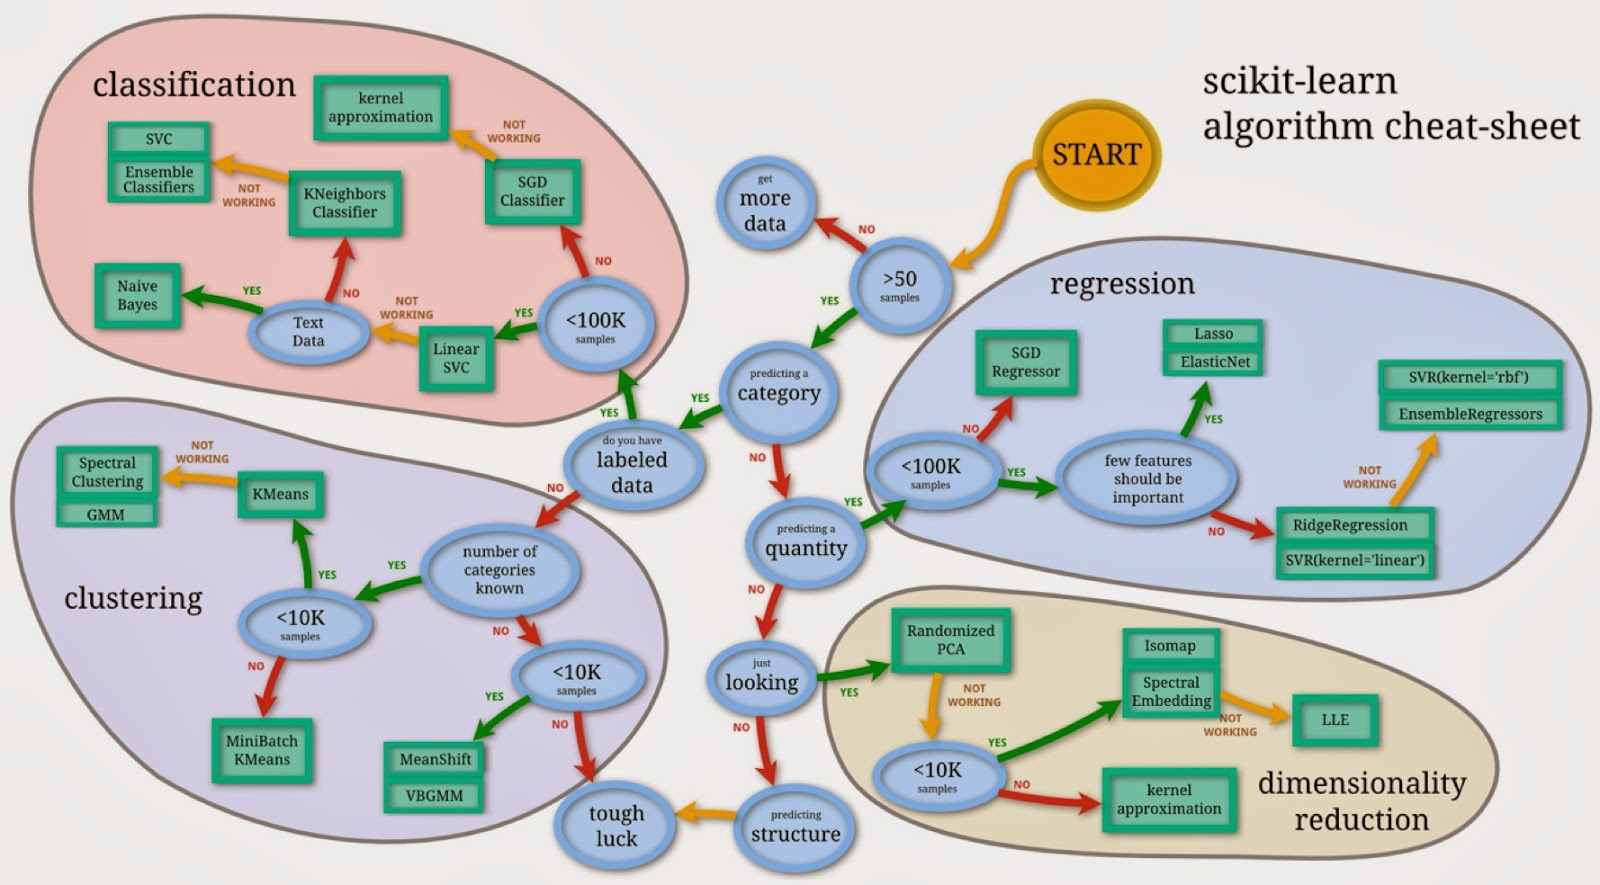

In [1]:
from IPython.display import Image
Image(filename='scikit-learn-flow-chart.jpg')  #source: web

* Overview of Statsmodels
    * Linear regression models
    * Generalized linear models
    * Discrete choice models
    * Robust linear models
    * Many models and functions for time series analysis
    * Nonparametric estimators
    * A collection of datasets for examples
    * A wide range of statistical tests
    * Input-output tools for producing tables in a number of formats (Text, LaTex, HTML) and for reading Stata files into NumPy and Pandas.
    * Plotting functions
    * Extensive unit tests to ensure correctness of results
   


**Contrast**

* Statsmodels
     * traditional model where we want to know how well a given model fits the data, and what variables "explain" or affect the outcome, or what the size of the effect is
     * analyzing the training data including hypothesis tests and goodness-of-fit measures
    
     
* Scikit-learn
     * machine learning algorithms where the main supported task is choosing the "best" model for prediction
     * model selection for out-of-sample prediction and hence cross-validation on "test data".

## Contents

* Generalized Linear Models
     * OLS
     * Testing
* Logistic Regression
* Time Series Analysis


In [2]:
%matplotlib inline
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from scipy import stats
import pandas as pd
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from statsmodels.base.model import GenericLikelihoodModel

##  OLS and Testing

Linear regression is in its basic form the same in statsmodels and in scikit-learn. However, Statsmodels can generate a summary of OLS result like Stata and R. Lecture 11 had already given an introduction to regression analysis in Sciki-learn, so we only present the different features owned by Statsmodels here.


Now consider the real model as follows: 
$$y = \beta_1 x + \beta_2 sin(x) + \beta_3 (x-3)^2 + \beta_0, \quad \text{ where } \epsilon \sim N(0,1)$$

In [3]:
n = 20
x = np.linspace(0, 5, n)

sigma = 0.3
beta = np.array([1, 0.5, -0.02,5])    # real coefficient
e = np.random.normal(size=n)
X = np.column_stack((x, np.sin(x), (x-3)**2, np.ones(n))) 
y_true = np.dot(X,beta)
y = y_true + e

In [4]:
#do regression
model = sm.OLS(y, X)   #Pick a class. GLS, WLS...
results = model.fit()

We can get the summary of the regression result just like R.

* Summary
```
results.summary()
```

We can also extract the values that we are interested in.

* Coefficients:        ```results.params```
* R square: ```results.rsquared```
* Fitted values: ```results.fittedvalues```
* Predicted values:   ```results.predict()```
* Standard errors of each coefficient:  ```results.bse```

In [5]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     16.03
Date:                Tue, 03 May 2016   Prob (F-statistic):           4.44e-05
Time:                        14:53:46   Log-Likelihood:                -21.592
No. Observations:                  20   AIC:                             51.18
Df Residuals:                      16   BIC:                             55.17
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.7893      0.411      4.355      0.0

In [6]:
print('Coefficients: ', results.params)
print('R2: ', results.rsquared)
print('Standard errors: ', results.bse)
print('Fitted values: ', results.fittedvalues)
print('Predicted values: ', results.predict())

Coefficients:  [ 1.7893301   1.96435659  0.32104257  2.0975902 ]
R2:  0.750366491542
Standard errors:  [ 0.41085449  0.70239255  0.15213774  1.46709401]
Fitted values:  [  4.98697334   5.48416331   5.99063564   6.47362943   6.905062
   7.26346243   7.53544993   7.71665512   7.81202093   7.83546222
   7.80890771   7.76079011   7.72408843   7.73405729   7.82579947
   8.03184902   8.37993116   8.8910533    9.57805861  10.44474174]
Predicted values:  [  4.98697334   5.48416331   5.99063564   6.47362943   6.905062
   7.26346243   7.53544993   7.71665512   7.81202093   7.83546222
   7.80890771   7.76079011   7.72408843   7.73405729   7.82579947
   8.03184902   8.37993116   8.8910533    9.57805861  10.44474174]


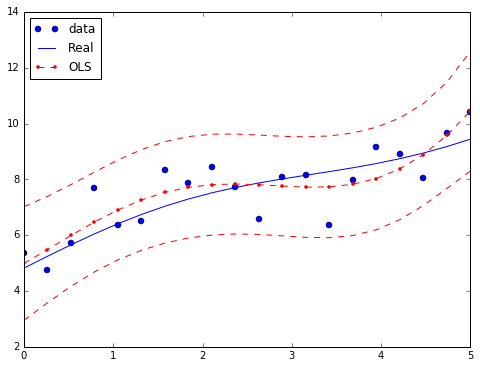

In [7]:
prstd, iv_l, iv_u = wls_prediction_std(results)
#wls_prediction_std returns standard deviation and 
#confidence interval of my fitted model data

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, y, 'o', label="data")
ax.plot(x, y_true, 'b-', label="Real")
ax.plot(x, results.fittedvalues, 'r--.', label="OLS")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
ax.legend(loc='best')

**Joint Test**

We can test $$R\beta = 0$$ or formula-like $$\beta_2 = \beta_3 = 0$$

In [8]:
#test beta_2 = beta_3 = 0
print(results.f_test("x2 = x3 = 0"))

#test R beta = 0
R = [[0, 1, 0, 0], [0, 0, 1, 0]]
print(results.f_test(R))

<F test: F=array([[ 3.96430241]]), p=0.039959573352059005, df_denom=16, df_num=2>
<F test: F=array([[ 3.96430241]]), p=0.039959573352058846, df_denom=16, df_num=2>


## Maximum Likelihood Estimation

Statsmodel has many built-in regression models using maximum likelihood estimation. However, Scikit-learn doesn't. 

In [9]:
data = sm.datasets.spector.load_pandas()  #use the dataset spector
exog = data.exog
endog = data.endog
print(sm.datasets.spector.NOTE)
print(data.exog.head())

::

    Number of Observations - 32

    Number of Variables - 4

    Variable name definitions::

        Grade - binary variable indicating whether or not a student's grade
                improved.  1 indicates an improvement.
        TUCE  - Test score on economics test
        PSI   - participation in program
        GPA   - Student's grade point average

    GPA  TUCE  PSI
0  2.66    20    0
1  2.89    22    0
2  3.28    24    0
3  2.92    12    0
4  4.00    21    0


In [10]:
exog1 = sm.add_constant(exog, prepend=True)   #combine X matrix with constant

#plug in the log-likelihood function of my own model
class MyProbit(GenericLikelihoodModel):
    def loglike(self, params):
        exog = self.exog
        endog = self.endog
        q = 2 * endog - 1
        y = stats.norm.logcdf(q*np.dot(exog, params)).sum()   
        return y

sm_probit_manual = MyProbit(endog, exog1).fit()
print(sm_probit_manual.summary())

Optimization terminated successfully.
         Current function value: 0.400588
         Iterations: 292
         Function evaluations: 494
                               MyProbit Results                               
Dep. Variable:                  GRADE   Log-Likelihood:                -12.819
Model:                       MyProbit   AIC:                             33.64
Method:            Maximum Likelihood   BIC:                             39.50
Date:                Tue, 03 May 2016                                         
Time:                        14:53:54                                         
No. Observations:                  32                                         
Df Residuals:                      28                                         
Df Model:                           3                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------

## Now I want to compare binary predictions.

* Logistic Regression using Statsmodels.

* Supporting Vector Machine (SVM) with linear kernal using Scikit-learn

I use the spector dataset which contained in Statsmodels package. To visualize the results, I set two exogenous variables, x1 and x2.

We all have familiarized with the mathematical formation of logistic regression. So I put a brief introduction graph about supporting vector machine algorithm as follows.

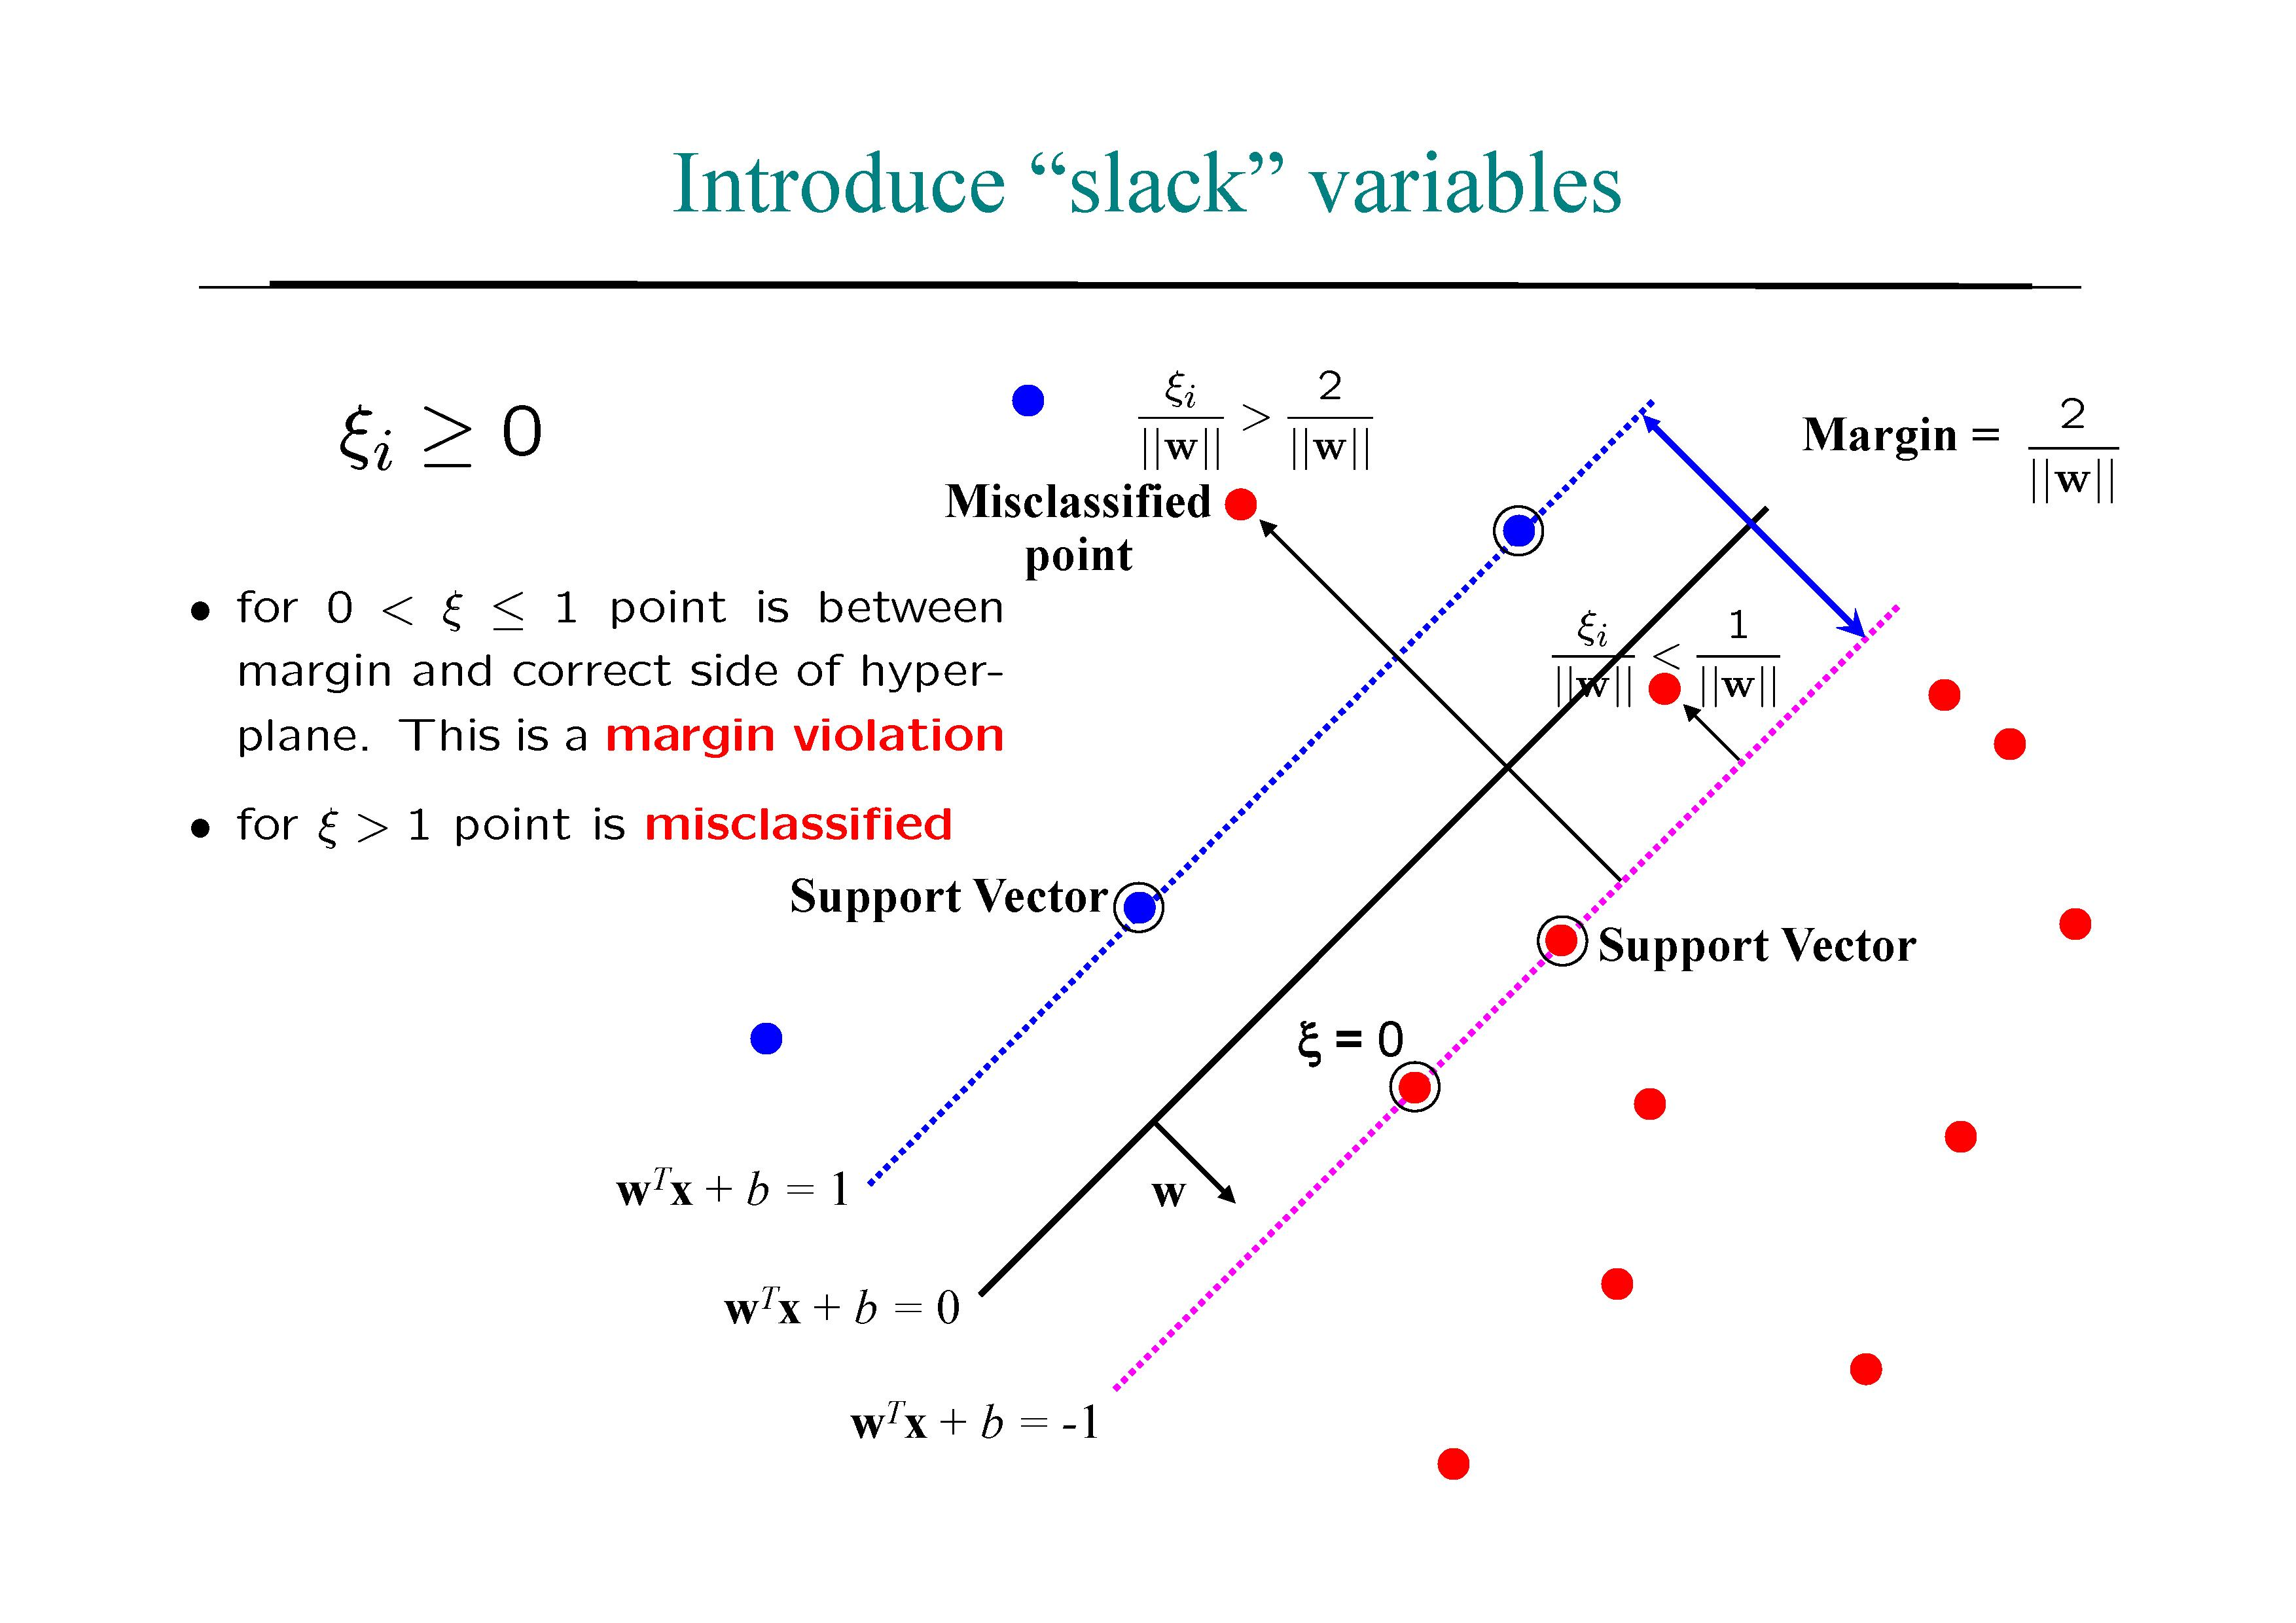

In [11]:
Image(filename='svm.jpg' )     #source : web

In [12]:
X = np.delete(data.exog.as_matrix(),2,1)
y = np.asarray(data.endog.tolist())

#classifiers
clf = svm.SVC(kernel='linear', C = 1)  

#fitting by Scikit-learn
model_svm = clf.fit(X,y)

#fitting by Statsmodels
XX = np.insert(X,0,1,axis = 1) #add a column with contant 1
model_logit_stats = sm.Logit(y,XX)
res = model_logit_stats.fit()

Optimization terminated successfully.
         Current function value: 0.499734
         Iterations 6


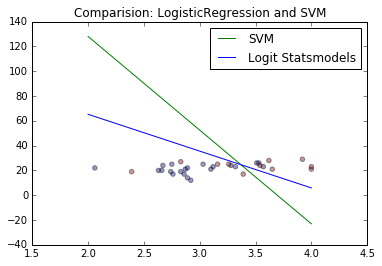

In [13]:
w = clf.coef_[0]
a = -w[0] / w[1]

c = -res.params[1] / res.params[2]

x1 = np.linspace(2,4)
x2 = a * x1 - clf.intercept_[0] / w[1]     #svm 
x3 = c * x1 - res.params[0] / res.params[2]     #logistic

h1 = plt.plot(x1,x2,'k-', color = 'green', label = 'SVM')
h2 = plt.plot(x1,x3,'k-', color = 'blue', label = 'Logit Statsmodels')
plt.scatter(X[:, 0], X[:,1], c = y, alpha = 0.4)
plt.legend()
plt.title('Comparision: LogisticRegression and SVM')
plt.show()

# Time Series Analysis

As I mentioned in the beginning, Scikit-learn focus on prediction of time series by machine learning algorithm. It doesn't contain traditional time series analysis such as ARMA, VAR, and relevant statictical tests. But you can find these in Statsmodels package.

In [14]:
dta = sm.datasets.sunspots.load_pandas().data  #use the dataset sunspot
print(sm.datasets.sunspots.NOTE)

::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.



In [15]:
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008')) #set time series
del dta["YEAR"]

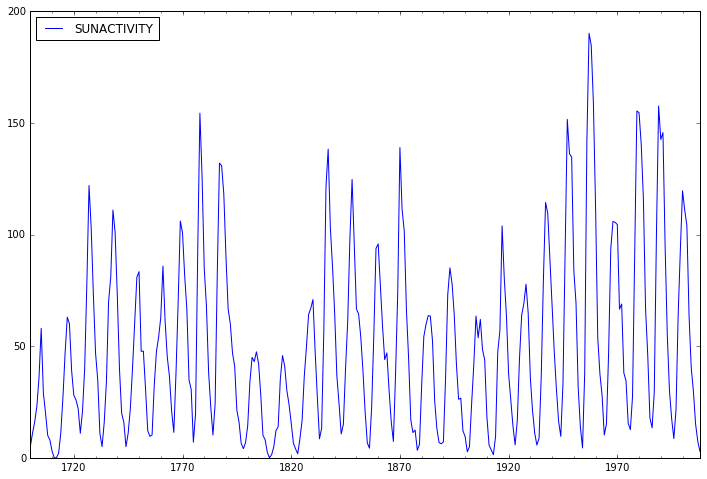

In [16]:
dta.plot(figsize=(12,8))

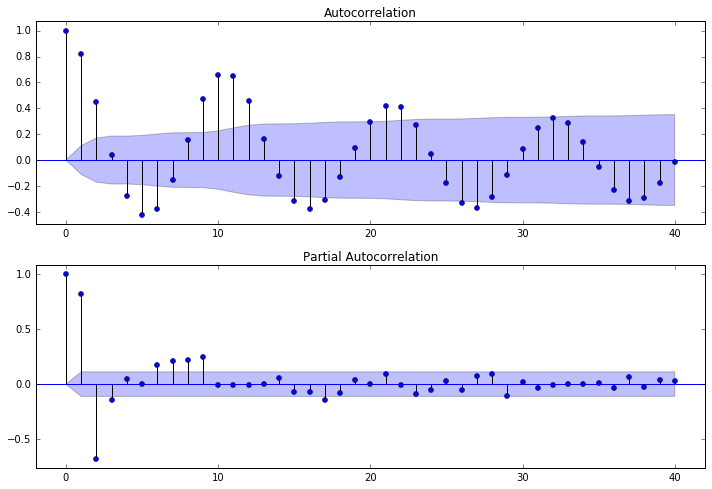

In [17]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)